## Formazione di Runoff superficiale 

* [Deflusso Hortoniano](#hort)
* [Deflusso Dunniano](#dunn)


Si procede poi osservando il comportamento del suolo, nel caso di produzione di runoff superficiale. Saranno presi in considerazione sia il caso di produzione di deflusso Hortoniano, caratteristico di una situazione dove il flusso di precipitazione è maggiore della capacità di infiltrazione del terreno, sia del deflusso Dunniano.


## Runoff Hortoniano <a class="anchor" id="hort"></a>

- Modello = Van Genuchten
- Stratigrafia = $2$ $[m]$ di limo argilloso
- Condizione iniziale = per suolo umido suzione varia da $-2$ $[m]$ a $0$ $[m]$
- Condizione al contorno al fondo = $free Drainage$
- Condizione al contorno alla superficie = $Coupled$
- Precipitazione: file *Pioggia_ve.csv*, dati relativi alle precipitazioni per un giorno, il 01.01.2020

Troviamo deflusso Hortoniano se:

\begin{equation}
\|J| \geq |K(\theta W)| + |K(\theta W)|\cdot\frac{\partial (\psi)}{\partial z}
\end{equation}

Questo è un meccanismo che avviene più facilmente nelle argille, dove la conducibilità idraulica è più bassa ed è quindi più semplice che il flusso di precipitazione sia maggiore.
Per questo viene preso come suolo uno omogeneo, di $2$ $[m]$, di limo argilloso. Quest'ultimo è caratteristico della zona nell'entroterra vicina alla stazione di Venezia utilizzata per l'analisi pluviometrica della prima esercitazione. Nei dintorni della città c'è in fatti una piana alluvionale caratterizzata dalla presenza di limi.

Nella trattazione che segue si prende in considerazione la possibilità di formazione del fenomeno di $ponding$ e quindi la creazione di una lama d'acqua sopra la superficie, che si infiltrerà poi col tempo all'interno del suolo.


Il .sim file utilizzato prevede che, nel caso in cui la suzione diventi maggiore di zero a causa dell'eccessiva intensità di precipitazione, si venga a formare in automatico un volume di acqua al di sopra del suolo. Fin tanto che la suzione è negativa, invece, si utilizza il modello di Van Genuchten.

Per questa simulazione la condizione a contorno per la superficie superiore sarà $Coupled$, si unisce in fatti l'equazione di Richards valida nel suolo con la possibilità di accumulare acqua in superficie. Per quello che riguarda la superficie inferiore la condizione al contorno assegnata è di $free drainage$.

<figure>
    <img src="horton_wet.jpg" width="700" height="700/1.618">
    <figcaption>Fig.1 - Deflusso su suolo umido. </figcaption>
<figure>

In [1]:
import os
import pandas as pd

from geoframepy.whetgeo1d import grid_creator
from geoframepy.whetgeo1d import grid_to_netcdf

import warnings
warnings.filterwarnings('ignore')
from geoframepy.timeseries import io_csv

project_path = os.path.dirname(os.getcwd())

In [2]:
grid_input_file_name = project_path + "/data/Grid_input/Runoff_clay_grid.csv"
ic_input_file_name = project_path + "/data/Grid_input/Runoff_ic_wet.csv"
parameter_input_file_name = project_path + "/data/Grid_input/Richards_VG.csv"
dictionary_input_file_name = project_path + "/data/Grid_input/dictionary.csv"
grid_type = 'classical'
dz_min = -9999
dz_max = -9999
b = -9999
psi_interp_model = "linear"
T_interp_model = "linear"

water_ponding_0 = -2.0
T_water_ponding_0 = 273.15
output_file_name =  project_path + "/data/Grid_NetCDF/Runoff_wet.nc"

output_title = '''
'''
output_summary = '''


'''

output_date = ''

output_institution = 'GEOframe'

Nel suolo vale l'equazione di Richards, inoltre possiamo accumulare acqua in superficie

In [3]:
output_file_name =  project_path + "/data/Grid_NetCDF/Runoff_wet.nc"
output_title = '''Griglia per la risoluzione dell'equazione di Richards.
                  '''
output_date = ''

output_summary = ''' 

Type,eta,K,equationStateID,parameterID
L,0,600,1,10
L,-2,0,nan,nan


eta,Psi0,T0
-0.0,-2.0,273.15
-2.0,0.0,273.15

'''


output_institution = 'GEOframe'

In [4]:
data_grid = pd.read_csv(grid_input_file_name)

data_ic = pd.read_csv(ic_input_file_name)

data_parameter = pd.read_csv(parameter_input_file_name, comment='#')
data_dictionary = pd.read_csv(dictionary_input_file_name)

[KMAX, eta, eta_dual, space_delta, z, z_dual, control_volume] = grid_creator.grid1D(data_grid, dz_min, b, dz_max, grid_type, shallow_water=True)

[psi_0, T_0] = grid_creator.set_initial_condition(data_ic, eta, psi_interp_model, T_interp_model, water_ponding_0=water_ponding_0, T_water_ponding_0=T_water_ponding_0, shallow_water=True)

control_volume_index = grid_creator.calibration_point_index(data_grid, eta)

[equation_state_ID, parameter_ID, theta_s, theta_r, par_1, par_2, par_3, par_4,
par_5, alpha_ss, beta_ss, ks] = grid_creator.set_parameters_richards(data_grid, data_parameter, data_dictionary, KMAX, eta)

grid_to_netcdf.write_grid_netCDF_richards(eta, eta_dual, z, z_dual, space_delta, control_volume, control_volume_index, psi_0, T_0, equation_state_ID, parameter_ID, KMAX,
                  theta_s, theta_r, par_1, par_2, par_3, par_4, par_5, alpha_ss, beta_ss, ks,
                  output_file_name, output_title, output_institution, output_summary, output_date, grid_input_file_name, parameter_input_file_name)



***SUCCESS writing!  C:\Users\emmat\Desktop\Progetto idrologia\OMS_WHETGEO1D/data/Grid_NetCDF/Runoff_wet.nc


In [5]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.style as style 
import matplotlib.colors as cl
import matplotlib.dates as mdates
import matplotlib
from geoframepy.timeseries import io_csv
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

style.available
style.use('seaborn-whitegrid')

nice_fonts = {
        "legend.frameon": True,
        "legend.fancybox": True,
        "legend.facecolor": "white",
        "axes.edgecolor": "0.8",
        "axes.linewidth": 0.6,
        "grid.linewidth":0.4,
        "text.usetex": False,
        "font.family": "serif",
        "axes.labelsize": 16,
        "font.size": 16,
        "legend.fontsize": 14,
        "xtick.labelsize": 14,
        "ytick.labelsize": 14,
}

my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#ece7f2","#d0d1e6","#a6bddb","#74a9cf","#3690c0","#0570b0","#045a8d","#023858"])
colors = ['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c', '#fdbf6f', '#ff7f00']

plt.rcParams.update(nice_fonts)

In [6]:
os.chdir(project_path+'/output')
ds = xr.open_dataset("Runoff_wet_0000.nc")
ds

<xarray.Dataset>
Dimensions:           (depth: 601, dualDepth: 601, time: 288)
Coordinates:
  * depth             (depth) float64 -1.998 -1.995 -1.992 ... -0.001667 0.0
  * dualDepth         (dualDepth) float64 -2.0 -1.997 -1.993 ... -0.003333 0.0
  * time              (time) datetime64[ns] 2020-01-01 ... 2020-01-01T23:55:00
Data variables:
    psi               (time, depth) float64 ...
    psiIC             (depth) float64 ...
    T                 (depth) float64 ...
    theta             (time, depth) float64 ...
    saturationDegree  (time, depth) float64 ...
    darcyVelocity     (time, dualDepth) float64 ...
    waterVolume       (time, depth) float64 ...
    error             (time) float64 ...
    topBC             (time) float64 ...
    bottomBC          (time) float64 ...
    runOff            (time) float64 ...
    controlVolume     (depth) float64 ...
Attributes:
    Description_of_the_problem:         WHETGEO-1D ex03 wet initial condition.
    Top_boundary_condition:             Top Coupled
    Bottom_boundary_condition:          Bottom free drainage
    path_top_boundary_condition:        C:\Users\titab\Desktop\OMS_Project_WH...
    path_bottom_boundary_condition:     C:\Users\titab\Desktop\OMS_Project_WH...
    path_grid:                          C:\Users\titab\Desktop\OMS_Project_WH...
    time_delta:                          
    swrc_model:                         {Water Depth,Van Genuchten}
    soil_hydraulic_conductivity_model:  {null,Mualem Van Genuchten}
    interface_conductivity_model:       max

In [7]:
rain = io_csv.pandas_read_OMS_timeseries(project_path + '/data/Timeseries/Pioggia_ve.csv',datetime_index=True)
rain.head()

,0
Datetime,
2020-01-01 00:00:00,0.0
2020-01-01 00:05:00,0.0
2020-01-01 00:10:00,0.0
2020-01-01 00:15:00,0.0
2020-01-01 00:20:00,0.0


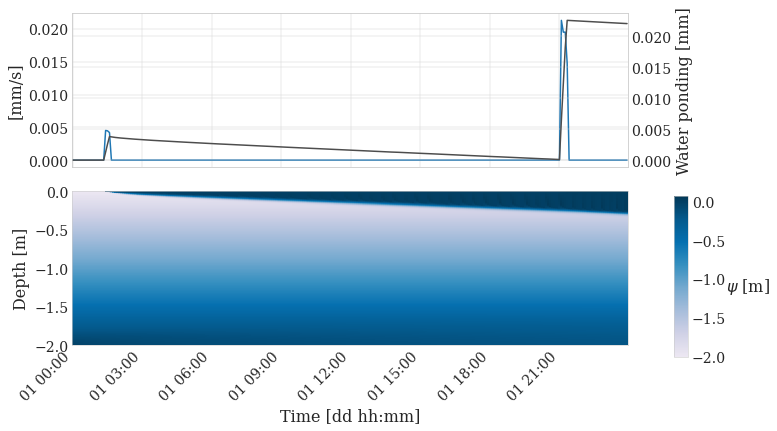

In [8]:
fig, ax = plt.subplots(2, 1, sharex='col', figsize=(10, 10/1.618)) 
norm = matplotlib.colors.Normalize(vmin=np.amin(ds.psi.values), vmax=np.amax(ds.psi.values))

ax[0].plot(ds.time.values, rain['0'][0:288]/300)
ax[0].set_ylabel('[mm/s]')

ax1=ax[0].twinx()
ds.waterVolume.sel(depth=0.0, method='nearest').plot(ax=ax1,color='0.3')
ax1.set_ylabel('Water ponding [mm]')
ax1.set_title(None)


a = ds.psi.plot(ax=ax[1], y='depth',add_colorbar=False, cmap=my_cmap, norm=norm)#, cbar_kwargs={'label': '$\psi$ [m]'})

ax[1].set_ylabel('Depth [m]')
ax[1].set_xlabel('Time [dd hh:mm]')


ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))
ax[1].xaxis.set_tick_params(rotation=45)

cbar_ax = fig.add_axes([0.95, 0.19, 0.02, 0.36])
sm = plt.cm.ScalarMappable(cmap=my_cmap, norm=norm)
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label('$\\psi$ [m]', rotation=0, labelpad=22)

plt.tight_layout()
plt.show()



Dai grafici soprastanti si può vedere come in corrispondenza dei picchi di precipitazione, si crea il fenomeno di *ponding*, quindi la presenza di un certo volume d'acqua al di sopra sopra la superficie, che si vede infiltrarsi poi col tempo all'interno del suolo. In corrispondenza del secondo picco, si nota inoltre un leggero aumento di intensità di suzione.

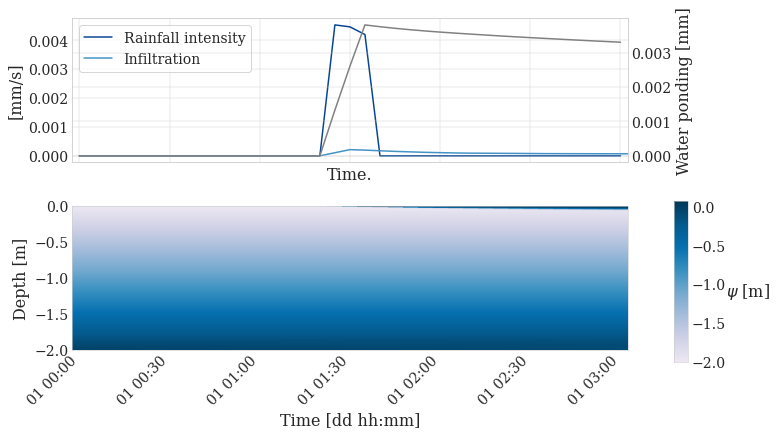

In [9]:
start = '2020-01-01 00:00'
end = '2020-01-01 03:00'

fig, ax = plt.subplots(2, 1, sharex='col', figsize=(10, 10/1.618)) 
norm = matplotlib.colors.Normalize(vmin=np.amin(ds.psi.values), vmax=np.amax(ds.psi.values))

ax[0].plot(ds.time.sel(time=slice(start,end)), rain['0'][start:end]/300,  color='#084594', label='Rainfall intensity')
(-ds.darcyVelocity.sel(dualDepth=0, method='nearest')*1000).plot(ax=ax[0], color='#4292c6', label='Infiltration')

ax[0].set_ylabel('[mm/s]')
ax[0].set_title(None)
ax[0].legend(loc='upper left')

ax1=ax[0].twinx()
ds.waterVolume.sel(time=slice(start,end)).sel(depth=0.0, method='nearest').plot(ax=ax1,color='0.5')
ax1.set_ylabel('Water ponding [mm]')
ax1.set_title(None)


a = ds.psi.sel(time=slice(start,end)).plot(ax=ax[1], y='depth',add_colorbar=False, cmap=my_cmap, norm=norm)#, cbar_kwargs={'label': '$\psi$ [m]'})

ax[1].set_ylabel('Depth [m]')
ax[1].set_xlabel('Time [dd hh:mm]')


ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))
ax[1].xaxis.set_tick_params(rotation=45)

cbar_ax = fig.add_axes([0.95, 0.19, 0.02, 0.36])
sm = plt.cm.ScalarMappable(cmap=my_cmap, norm=norm)
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label('$\\psi$ [m]', rotation=0, labelpad=22)

plt.tight_layout()
plt.show()


Questo ingrandimento del grafico precedente, mostra l'iniziale formazione di un volume d'acqua in superficie (linea grigia) e di infiltrazione (linea azzurra) in corrispondenza del primo picco di precipitazione.

Questo è un dettaglio del grafico visto sopra: in blu l'intensità della pioggia; mentre in azzurro la velocità del flusso d'acqua all'interfaccia: quello che si nota è che come la pioggia inizia, l'infiltrazione è si discosta leggermente da zero, mentre la velocità di precipitazione è attorno a: $0.004$ [$mm/s$]. Di conseguenza per questo squilibrio tra quello che precipita e ciò che si infiltra nel suolo, abbiamo un accumulo d'acqua in superficie. Come la pioggia smette, il volume d'acqua non cresce più e si inizia a infiltrare nel suolo.

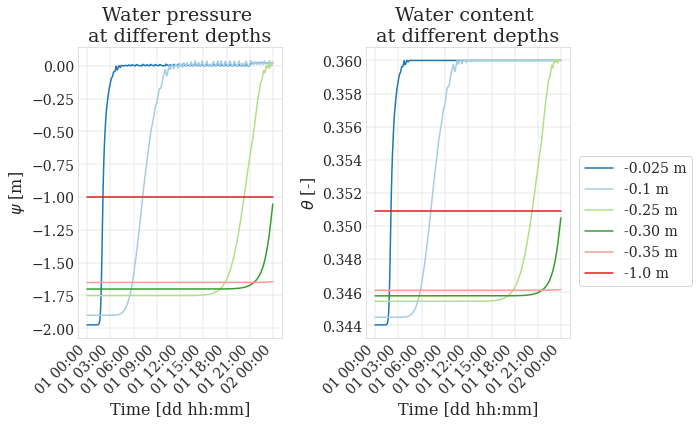

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10/1.618)) 

ds.psi.sel(depth=-0.025,  method='nearest').plot(ax=ax1, color=colors[1])
ds.psi.sel(depth=-0.1,  method='nearest').plot(ax=ax1, color=colors[0])
ds.psi.sel(depth=-0.25,  method='nearest').plot(ax=ax1, color=colors[2])
ds.psi.sel(depth=-0.30,  method='nearest').plot(ax=ax1, color=colors[3])
ds.psi.sel(depth=-0.35,  method='nearest').plot(ax=ax1, color=colors[4])
ds.psi.sel(depth=-1.0,  method='nearest').plot(ax=ax1, color=colors[5])


ax1.set_title('Water pressure \nat different depths')


ax1.set_ylabel('$\psi$ [m]')
ax1.set_xlabel('Time [dd hh:mm]')

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))
ax1.xaxis.set_tick_params(rotation=45)
ds.theta.sel(depth=-0.025, method='nearest').plot(ax=ax2, label = '-0.025 m', color=colors[1])
ds.theta.sel(depth=-0.1, method='nearest').plot(ax=ax2, label = '-0.1 m', color=colors[0])
ds.theta.sel(depth=-0.25, method='nearest').plot(ax=ax2, label = '-0.25 m', color=colors[2])
ds.theta.sel(depth=-0.30, method='nearest').plot(ax=ax2, label = '-0.30 m', color=colors[3])
ds.theta.sel(depth=-0.35, method='nearest').plot(ax=ax2, label = '-0.35 m', color=colors[4])
ds.theta.sel(depth=-1.0, method='nearest').plot(ax=ax2, label = '-1.0 m', color=colors[5])


ax2.set_title('Water content \nat different depths')


ax2.set_ylabel('$\\theta$ [-]')
ax2.set_xlabel('Time [dd hh:mm]')

ax2.xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))
ax2.xaxis.set_tick_params(rotation=45)

ax2.legend(bbox_to_anchor=(1.01,0.65), ncol=1)

plt.tight_layout()
plt.show()

Da entrambi i grafici si nota che l'acqua impiega abbastanza tempo per infiltrarsi nel suolo: poco meno di 3h per reaggiungere i primi $2.5$ [$cm$] di suolo e dopo quasi 15ore è arrivata a $25$ [$cm$] di profondità. In generale sembra che nelle 24h si sia infiltrata di $30-35$ [$cm$], una conferma di questo sono i valori di suzione e contenuto d'acqua costanti per profondità maggiori di $30$ [$cm$].

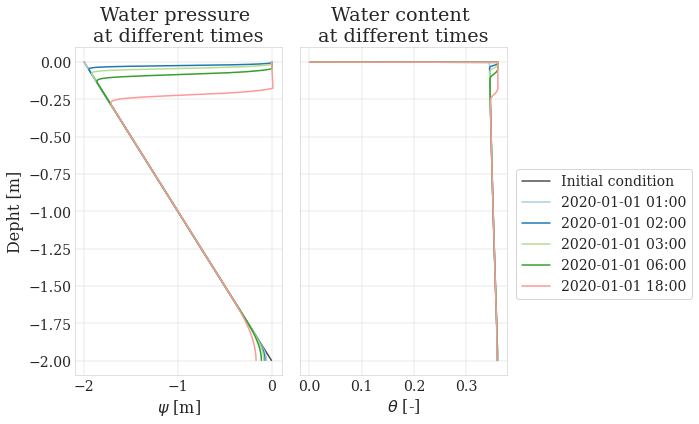

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey='row', figsize=(10, 10/1.618)) 

ds.psiIC.plot(ax=ax1, y='depth', label='Initial condition', color='0.3')
ds.psi.sel(time='2020-01-01 01:00').plot(ax=ax1, y='depth', label='2020-01-01 01:00', color=colors[0])
ds.psi.sel(time='2020-01-01 02:00').plot(ax=ax1, y='depth', label='2020-01-01 02:00', color=colors[1])
ds.psi.sel(time='2020-01-01 03:00').plot(ax=ax1, y='depth', label='2020-01-01 03:00',color=colors[2])
ds.psi.sel(time='2020-01-01 06:00').plot(ax=ax1, y='depth', label='2020-01-01 06:00', color=colors[3])
ds.psi.sel(time='2020-01-01 18:00').plot(ax=ax1, y='depth', label='2020-01-01 18:00', color=colors[4])
# ds.psi.sel(time='2020-01-02 00:00').plot(ax=ax1, y='depth', label='2020-01-02 00:00', color=colors[5])

ax1.set_title('Water pressure \nat different times')

ax1.set_ylabel('Depht [m]')
ax1.set_xlabel('$\psi$ [m]')

plt.plot(np.nan, np.nan, label='Initial condition', color='0.3')
ds.theta.sel(time='2020-01-01 01:00').plot(ax=ax2, y='depth', label='2020-01-01 01:00', color=colors[0])
ds.theta.sel(time='2020-01-01 02:00').plot(ax=ax2, y='depth', label='2020-01-01 02:00', color=colors[1])
ds.theta.sel(time='2020-01-01 03:00').plot(ax=ax2, y='depth', label='2020-01-01 03:00', color=colors[2])
ds.theta.sel(time='2020-01-01 06:00').plot(ax=ax2, y='depth', label='2020-01-01 06:00', color=colors[3])
ds.theta.sel(time='2020-01-01 18:00').plot(ax=ax2, y='depth', label='2020-01-01 18:00', color=colors[4])

ax2.set_title('Water content \nat different times')

ax2.set_ylabel('')
ax2.set_xlabel('$\\theta$ [-]')


ax2.legend(bbox_to_anchor=(1.01,0.65), ncol=1)

plt.tight_layout()
plt.show()

In corrispondenza del fondo invece si notano gli effetti delle condizioni a contorno *free Drainage* imposte al problema: la falda non ha suzione costante ma all'andare del tempo inizia a diminuire. Inoltre, si può notare che con il passare del tempo la memoria delle condizioni iniziali di equilibrio (condizioni idrostatiche) si va a perdere.

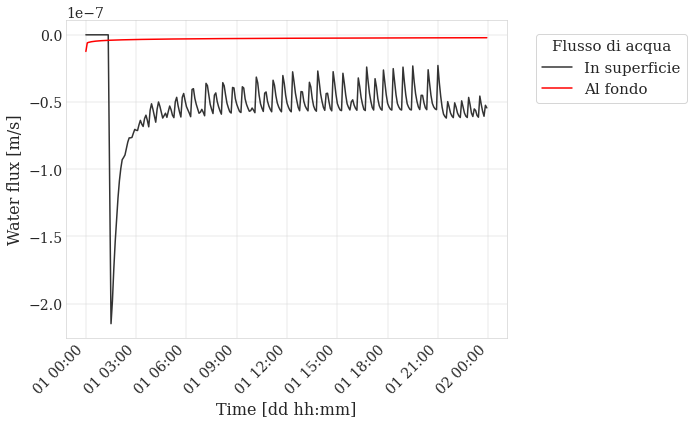

In [27]:
fig, ax= plt.subplots(1, 1, figsize=(10, 10/1.618)) 

ds.darcyVelocity.sel(dualDepth=0, method='nearest').plot(ax=ax, label='Surface', color='0.2')
ds.darcyVelocity.sel(dualDepth=-2, method='nearest').plot(ax=ax, label='Bottom', color='red')


ax.set_title('')

ax.set_ylabel('Water flux [m/s]')

ax.set_xlabel('Time [dd hh:mm]')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))
ax.xaxis.set_tick_params(rotation=45)

plt.legend(['In superficie', 'Al fondo'], loc='center left',  title = "Flusso di acqua", title_fontsize = 15, fontsize=15, bbox_to_anchor=(1.05,0.85))

plt.tight_layout()
plt.show()

Le oscillazioni che ritroviamo nel grafico sono dovute ad un aspetto numerico: risolvendo l’equazione di Richards al tempo n e al tempo n + 1 si ha una variazione della conducibilità idraulica tra i due istanti. Per ovviare in parte a questo problema si potrebbe iterare il calcolo della soluzione specificando due iterazioni di Picard. Il fenomeno è quindi legato in parte alla non linearità della conducibilità idraulica e quindi al fatto che piccole variazioni di $\psi$ possono portare importanti variazioni in $K$

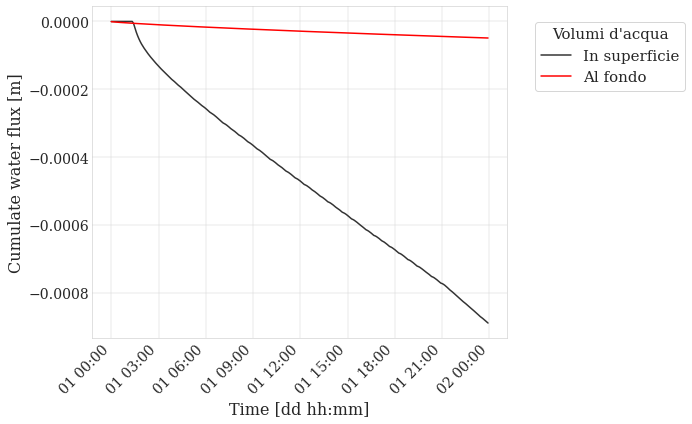

In [28]:
fig, ax= plt.subplots(1, 1, figsize=(10, 10/1.618)) 

(ds.darcyVelocity.sel(dualDepth=0, method='nearest')*60).cumsum().plot(ax=ax, label='Surface', color='0.2')
(ds.darcyVelocity.sel(dualDepth=-2, method='nearest')*60).cumsum().plot(ax=ax, label='Bottom', color='red')


ax.set_title('')

ax.set_ylabel('Cumulate water flux [m]')

ax.set_xlabel('Time [dd hh:mm]')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))
ax.xaxis.set_tick_params(rotation=45)

plt.legend(['In superficie', 'Al fondo'], loc='center left',  title = "Volumi d'acqua", title_fontsize = 15, fontsize=15, bbox_to_anchor=(1.05,0.85))

plt.tight_layout()
plt.show()

In quest'ultimo grafico si può osservare la cumulata dei volumi d'acqua che entrano/escono dal dominio: in superficie dopo 24h il volume d'acqua entrato è tra i $0-8-0.9$ [$mm$], mentre al fondo c'è una variazione sempre dovuta alle condizioni imposte al contorno di *free Drainage*.

## Runoff Dunniano <a class="anchor" id="dunn"></a>
Se il suolo è già completamente saturo, l'acqua non ha modo di infiltrarsi e si genera quindi nuovamente il fenomeno di $ponding$. In questa casistica è valida l'equazione:
\begin{equation}
\|J| \leq |K(\theta W)| + |K(\theta W)|\cdot\frac{\partial (\psi)}{\partial z}
\end{equation}

L'initensità di precipitazione è minore o uguale alla capacità di infiltrazione del suolo:.

Non essendo qui necessario avere un terreno in argilla o limo per apprezzare i risultati, ma un suolo con alta conduttività, viene mantenuta la stratigrafia usata nell'esercitazione di Richards:
- stratigrafia:
    - Sabbia fino ad una profondità di $0.3$ [$m$]
    - Argilla Limosa fino ad una profondità di $2$ [$m$]
- Modello = Van Genuchten
- Condizione iniziale idrostatica
- Condizione al contorno al fondo = $free Drainage$
- Condizione al contorno alla superficie = $Neumann$
- Precipitazione = file ex04_rainfall, dati relativi alle precipitazioni a 3 giorni di giorni.


<figure>
    <img src="dunniano.jpg" width="700" height="700/1.618">
    <figcaption>Fig.3 - Deflusso Dunniano. </figcaption>
<figure>
    
Le condizioni al contorno per la superficie superiore è sempre $Coupled$, per l'accoppiamento dei fenomeni di saturazione da sotto e di precipitazione da sopra: assegnando l'intensità di pioggia come condizione al contotno il codice in automatico gestisce il volume d'acqua che esce per accumularsi in superficie.


In [29]:
grid_input_file_name = project_path + "/data/Grid_input/Runoff_grid.csv"
ic_input_file_name = project_path + "/data/Grid_input/Runoff_ic_04.csv"
parameter_input_file_name = project_path + "/data/Grid_input/Richards_VG.csv"
dictionary_input_file_name = project_path + "/data/Grid_input/dictionary.csv"
grid_type = 'classical'
dz_min = 0.01
dz_max = 0.05
b = 0.5
psi_interp_model = "linear"
T_interp_model = "linear"

water_ponding_0 = -5
T_water_ponding_0 = 273.15
output_file_name =  project_path + "/data/Grid_NetCDF/Runoff_sat.nc"

output_title = '''
'''
output_summary = '''


'''

output_date = ''

output_institution = 'GEOframe'

In [30]:
output_file_name =  project_path + "/data/Grid_NetCDF/Runoff_sat.nc"
output_title = '''Griglia per la risoluzione dell'equazione di Richards.
                  '''
output_date = ''

output_summary = ''' 

Type,eta,K,equationStateID,parameterID
L,0,400,0,1
L,-0.3,400,0,10
L,-2,0,nan,nan


eta,Psi0,T0
0,-5,273.15
-2,-3,273.15

'''


output_institution = 'GEOframe'

In [31]:
data_grid = pd.read_csv(grid_input_file_name)

data_ic = pd.read_csv(ic_input_file_name)

data_parameter = pd.read_csv(parameter_input_file_name, comment='#')
data_dictionary = pd.read_csv(dictionary_input_file_name)

[KMAX, eta, eta_dual, space_delta, z, z_dual, control_volume] = grid_creator.grid1D(data_grid, dz_min, b, dz_max, grid_type, shallow_water=True)

[psi_0, T_0] = grid_creator.set_initial_condition(data_ic, eta, psi_interp_model, T_interp_model, water_ponding_0=water_ponding_0, T_water_ponding_0=T_water_ponding_0, shallow_water=True)

control_volume_index = grid_creator.calibration_point_index(data_grid, eta)

[equation_state_ID, parameter_ID, theta_s, theta_r, par_1, par_2, par_3, par_4,
par_5, alpha_ss, beta_ss, ks] = grid_creator.set_parameters_richards(data_grid, data_parameter, data_dictionary, KMAX, eta)

grid_to_netcdf.write_grid_netCDF_richards(eta, eta_dual, z, z_dual, space_delta, control_volume, control_volume_index, psi_0, T_0, equation_state_ID, parameter_ID, KMAX,
                  theta_s, theta_r, par_1, par_2, par_3, par_4, par_5, alpha_ss, beta_ss, ks,
                  output_file_name, output_title, output_institution, output_summary, output_date, grid_input_file_name, parameter_input_file_name)



***SUCCESS writing!  C:\Users\emmat\Desktop\Progetto idrologia\OMS_WHETGEO1D/data/Grid_NetCDF/Runoff_sat.nc


In [32]:
ds = xr.open_dataset(project_path + '/output/Runoff_sat_0000.nc')
ds

<xarray.Dataset>
Dimensions:           (depth: 1201, dualDepth: 1201, time: 865)
Coordinates:
  * depth             (depth) float64 -1.999 -1.996 -1.993 ... -0.00025 0.0
  * dualDepth         (dualDepth) float64 -2.0 -1.997 -1.994 ... -0.0005 0.0
  * time              (time) datetime64[ns] 2020-01-01 ... 2020-01-04
Data variables:
    psi               (time, depth) float64 ...
    psiIC             (depth) float64 ...
    T                 (depth) float64 ...
    theta             (time, depth) float64 ...
    saturationDegree  (time, depth) float64 ...
    darcyVelocity     (time, dualDepth) float64 ...
    waterVolume       (time, depth) float64 ...
    error             (time) float64 ...
    topBC             (time) float64 ...
    bottomBC          (time) float64 ...
    runOff            (time) float64 ...
    controlVolume     (depth) float64 ...
Attributes:
    Description_of_the_problem:         WHETGEO-1D ex04.
    Top_boundary_condition:             Top Coupled
    Bottom_boundary_condition:          Bottom Dirichlet
    path_top_boundary_condition:        C:\Users\titab\Desktop\OMS_Project_WH...
    path_bottom_boundary_condition:     C:\Users\titab\Desktop\OMS_Project_WH...
    path_grid:                          C:\Users\titab\Desktop\OMS_Project_WH...
    time_delta:                          
    swrc_model:                         {Water Depth,Van Genuchten}
    soil_hydraulic_conductivity_model:  {null,Mualem Van Genuchten}
    interface_conductivity_model:       max

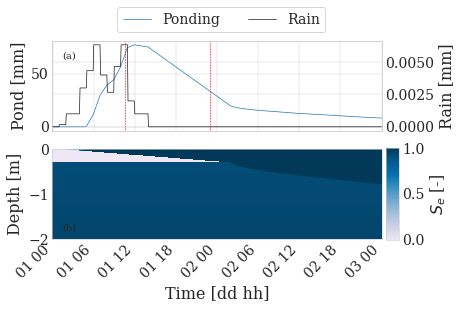

In [33]:
line_w = 0.7

start_date = '2020-01-01 00:00'
end_date = '2020-01-03 00:00'

plot_width = 15/2.54

fig, ax = plt.subplots(2, 1, sharex='col', gridspec_kw={'height_ratios': [1,1]},figsize=(plot_width,plot_width/1.618))

lns1 = ax[0].plot(ds.time.sel(time=slice(start_date, end_date)).values, ds.waterVolume.sel(depth=0).sel(time=slice(start_date,end_date))*1000, label='Ponding', color='#1f78b4', linewidth=line_w)

ax0twin = ax[0].twinx()
lns2 = ax0twin.plot(ds.time.sel(time=slice(start_date, end_date)).values, ds.topBC.sel(time=slice(start_date,end_date))/300, label='Rain', linewidth=line_w, color='0.1')

ax0twin.set_ylabel('Rain [mm]')
ax[0].set_ylabel('Pond [mm]')
lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax[0].legend(lns, labs, bbox_to_anchor=(0.85,1.45) , ncol=2)


norm = matplotlib.colors.Normalize(vmin=0, vmax=1)
im = ds.saturationDegree.where(ds.depth<0.0).sel(time=slice(start_date, end_date)).plot(ax=ax[1], y='depth', add_colorbar=False, cmap=my_cmap, norm=norm)
ax[1].set_ylabel('Depth [m]')
ax[1].set_xlabel('Time [dd hh]')

cbaxes = fig.add_axes([0.91, 0.122, 0.03, 0.35]) 
cbar = fig.colorbar(im, ax=ax[1],orientation="vertical",fraction=0.07, pad=0.1, cax=cbaxes, label='$S_e$ [-]')

ax[0].axvline(x=ds.time.sel(time='2020-01-01 10:35').values, linewidth=0.8, linestyle=(0, (1, 1)), color='red')
ax[0].axvline(x=ds.time.sel(time='2020-01-01 23:00').values, linewidth=0.8, linestyle=(0, (1, 1)), color='red')

ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%d %H'))
ax[1].xaxis.set_tick_params(rotation=45)

plt.text( 0.03,0.8, '(a)', fontsize=10,
             transform=ax[0].transAxes)
plt.text( 0.03,0.1, '(b)', fontsize=10,
             transform=ax[1].transAxes)


plt.show()

Nei primi istanti di precipitazione l'acqua si infiltra verso il fondo, anche quando la pioggia cessa di persistere. Si può notare che nei primi 30 cm, che inizialmemte partono da una condizionne di suolo asciutto, l'acqua di precipitazione inizia a infiltrarsi fino a saturare completamente lo strato di sabbia, circa 24h dopo.  

Il fronte di saturazione si muove sia verso il basso che verso l'alto: in parte acqua tende a infiltrare sotto (fronte si abbassa) mentre il primo layer si satura da sotto. La falda che era presente sulla superficie di discontinuità idraulica (sabbia-argilla) tende a salire e dopo molto tempo ad arrivare in superficie, fino a portare alla completa saturazione della colonna di suolo.

Si crea inizialmente un eccesso di volume d'acqua che si accumula in superficie (pondig),  poi quando la pioggia cessa il volume accumulato si infiltra mano a mano.

Per la produzione di Runoff superficiale conta più che altro la profondità dello strato sopra: se lo strato ha una capacità di immagazzinamento piccola è più facile che si abbia accumulo di acqua in superficie.

Questo meccanismo di deflusso superficiale è molto più lento rispetto al meccanismo Hortoniano: si vede dal fatto che anche dopo poco più di 24h la colonna di suolo non è ancora completamente satura.